In [1]:
#Using the Keras Example Here: https://keras.io/examples/vision/mnist_convnet/
#Help from here: https://keras.io/examples/vision/image_classification_from_scratch/
# https://www.kaggle.com/datasets/brsdincer/hirise-map-mars-nasa-image
#https://data.nasa.gov/api/views/egmv-36wq

import numpy as np
import keras
from keras import layers
from matplotlib import pyplot as plt

In [2]:
#Mount google drive and get the data loaded in
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
image_size = (227, 227)
batch_size = 16
num_classes = 8
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/subset_dir/landmark_train",
    validation_split=0.1,
    subset="both",
    seed = 1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 408 files belonging to 8 classes.
Using 368 files for training.
Using 40 files for validation.


In [24]:
input_shape= (227, 227, 3)
model = keras.Sequential(
    [
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
    ]
)
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 225, 225, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 193600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 193600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │     1,548,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,568,200 (5.98 MB)

 Trainable params: 1,568,200 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
epochs = 15
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.1495 - loss: 731.6614 - val_accuracy: 0.1500 - val_loss: 2.3496
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.4871 - loss: 1.5007 - val_accuracy: 0.1250 - val_loss: 3.2514
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5788 - loss: 1.2721 - val_accuracy: 0.2000 - val_loss: 3.4388
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6813 - loss: 0.9961 - val_accuracy: 0.2750 - val_loss: 4.0405
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6781 - loss: 0.8230 - val_accuracy: 0.2750 - val_loss: 4.5313
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7557 - loss: 0.6519 - val_accuracy: 0.3500 - val_loss: 4.5322
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7993 - loss: 0.6419 - val_accuracy: 0.4000 - val_loss: 4.6272
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7981 - loss: 0.7034 - val_accuracy: 0.4000 -

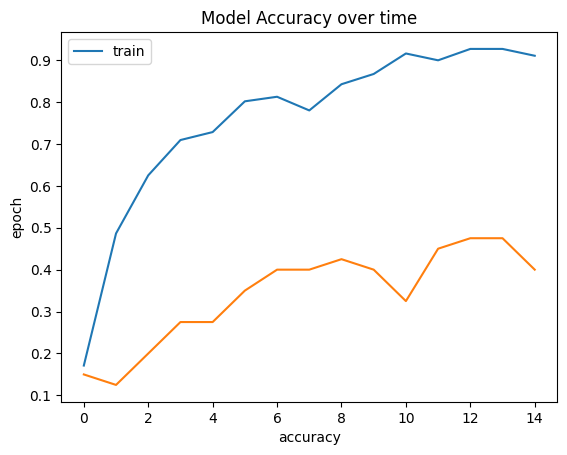

In [27]:
#Plot model history - accuracy
#Help from stack overflow: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy over time")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train'])

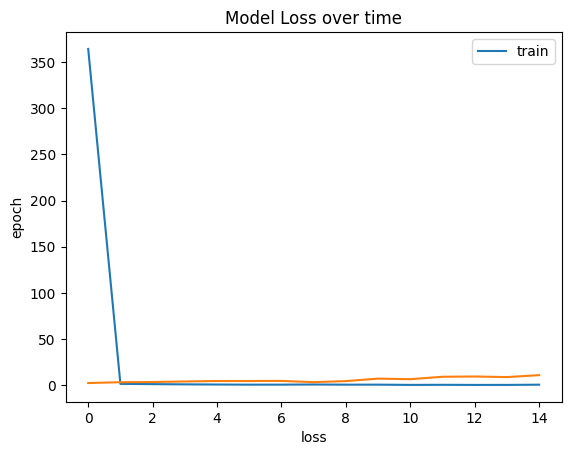

In [28]:
#Plot model history - loss
#Help from stack overflow: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss over time")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train'])

In [30]:
test_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/subset_dir/landmark_train",
    image_size=image_size)

Found 408 files belonging to 8 classes.


In [31]:
score = model.evaluate(test_ds, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 1.2769421339035034
Test accuracy: 0.8774510025978088
